# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns

In [149]:
df = pd.read_csv(r'C:\Users\vitor\Documents\Anaconda\Material_de_Apoio_do_Exercício\demo01.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [151]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [152]:
df.shape

(16650, 16)

In [153]:
df.drop_duplicates()
df.shape

(16650, 16)

In [154]:
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [155]:
df['mau'].value_counts()

mau
False    16260
True       390
Name: count, dtype: int64

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [156]:
df_info = pd.DataFrame(df.dtypes, columns=['Tipo de Dados'])
df_info

,Tipo de Dados
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,int64
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object
idade,float64
tempo_emprego,float64


In [157]:
lista = []
lista_colunas = df.columns
lista_colunas

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

In [158]:
for colunas in lista_colunas:
    numero_unico = df[colunas].nunique()
    lista.append(numero_unico)
print(lista)
len(lista)   

[2, 2, 2, 8, 5, 5, 5, 6, 5298, 3005, 1, 2, 2, 2, 9, 2]


16

In [159]:
df_info['qtd_categorias'] = lista
df_info

,Tipo de Dados,qtd_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [160]:
df_quanti = df.drop(['tipo_renda','educacao','estado_civil','tipo_residencia'], axis=1)

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [161]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [162]:
df[['tipo_renda','educacao','estado_civil','tipo_residencia']].nunique()

tipo_renda         5
educacao           5
estado_civil       5
tipo_residencia    6
dtype: int64

In [163]:
df_quanti.sexo =  df_quanti.sexo.map({'M': 1, 'F': 0})
df_quanti.posse_de_veiculo =  df_quanti.posse_de_veiculo.map({'Y': 1, 'N': 0})
df_quanti.posse_de_imovel =  df_quanti.posse_de_imovel.map({'Y': 1, 'N': 0})
df_quanti.mau = df_quanti.mau.astype(int)
df_quanti.head(3)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,1,1,1,0,58.832877,3.106849,1,0,0,0,2.0,0
1,0,0,1,0,52.356164,8.358904,1,0,1,1,1.0,0
2,0,0,1,0,52.356164,8.358904,1,0,1,1,1.0,0


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [164]:
tabela_cruzada = pd.crosstab(index= df['possui_email'], columns= df['posse_de_veiculo'])
print(tabela_cruzada)
tabela_cruzada2 = pd.crosstab(index= df['posse_de_veiculo'], columns= df['possui_email'])


posse_de_veiculo     N     Y
possui_email                
0                 9341  5829
1                  837   643


In [165]:
df_mau = df[df['mau'] == 1]
df_mau.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
284,F,N,N,0,Working,Secondary / secondary special,Married,House / apartment,52.890411,9.030137,1,1,0,0,2.0,True
328,F,Y,N,0,Commercial associate,Higher education,Married,House / apartment,37.142466,1.605479,1,1,1,0,2.0,True
393,F,N,Y,2,Working,Secondary / secondary special,Married,House / apartment,29.342466,6.441096,1,0,0,0,4.0,True
625,F,Y,N,2,Working,Secondary / secondary special,Married,House / apartment,38.158904,8.361644,1,0,0,0,4.0,True
627,F,Y,N,2,Working,Secondary / secondary special,Married,House / apartment,38.158904,8.361644,1,0,0,0,4.0,True


<Axes: xlabel='posse_de_veiculo', ylabel='count'>

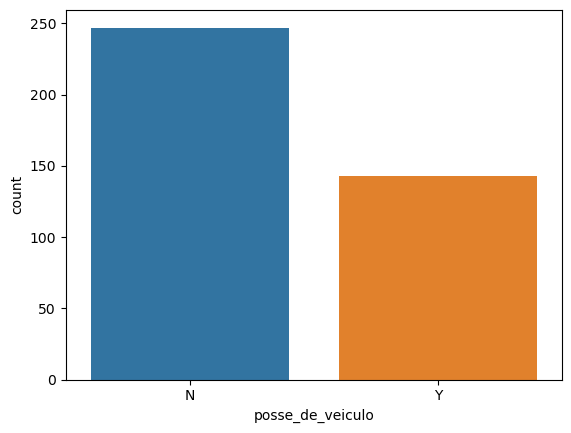

In [166]:
sns.countplot(data=df_mau , x='posse_de_veiculo')

<Axes: xlabel='possui_email', ylabel='count'>

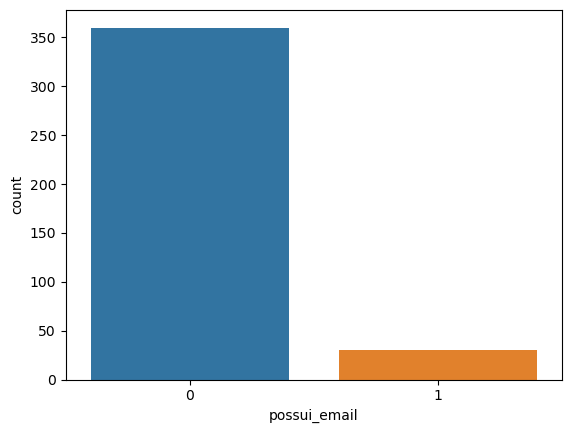

In [167]:
sns.countplot(data=df_mau , x='possui_email')

podemos perceber que a maioria dos mau pagadores não possuem email

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [169]:
df_quanti = df_dummies